# Multi-layer Perceptron (MLP)

In this notebook we describe the another kind of feedforward Neural Network, the Multi-layer Perceptron or MLP. The structure of the notebook is:

- [Theoretical Analysis](#s1)
    - [Algorithm](#s1.1)
    - [Practical Tips](#s1.2)
- [Implementation in Python](#s2)
- [Mini-challenge](#s3)

##  <a class="anchor" id='s1'> Theoretical Analysis </a> 

In Supervised Machine Learning, __multilayer perceptron (MLP)__,  is one of the primary machine learning techniques for both regression and classification.

In the context of Neural Networks, a multilayer perceptron is a class of feedforward Neural Network. The term MLP is used ambiguously, sometimes loosely to refer to any feedforward NN, sometimes strictly to refer to networks composed of multiple layers of perceptrons (with threshold activation). We use here the name MLP to describe a feedforward NN with an arbitrary number of hidden layers and for arbitrary activation function without referring necessarly to the step function used in the single layer perceptron.

Therefore, an MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training as we will see. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

The following defines a prototypical M-layer (M-2 hidden layers) MLP with a one-dimensional output and a $p$-dimensional input

- The output perceptron has an activation function $g_o$ and hidden layer nodes have activation function $g$

- Every perceptron in layer $l_{k-1}$; layers are "fully connected." Thus, every perceptron depends on the outputs of all the perceptrons in the previous layer (this is without loss of generality since the weight connecting two perceptrons can still be zero, which is the same as no connection being present)

- There are no connections between perceptrons in the same layer


Schematically, a four-layer MLP can the drawn as


<div>
<img width=500 src='../NeuralNetwork/images/mlp.png' /> 
</div>

###  <a class="anchor" id='s1.1'> Algorithm </a> 

Before entering in the details of the algorithm we give some definition


\begin{align*}
x_i&:\quad\text{$i$-th $(p+1)$-dimensional training input vector}\,\left(1,x_{1i},\cdots, x_{pi}\right)\\
y_i&:\quad\text{$i$-th training output vector}\\
w_{jm}^k&:\quad\text{weight for node $m$ in layer $l_k$ for incoming node $j$}\\
b_{m}^k&:\quad\text{bias for node $m$ in layer $l_k$}\\
w_{m}^k&:\quad\text{$j+1$-dimensional vector weight for node $m$ in layer $l_k$}\\
o_m^k&:\quad\text{output for the node $m$ in the layer $l_k$}\\
M_k&:\quad\text{number of nodes in layer $l_k$}\\
g&:\quad\text{activation function for the hidden layer nodes}\\
g_o&:\quad\text{activation function for the output layer nodes}
\end{align*}

In the following, we leave the specification of the activation functions generic, even tough one of the common choice is the sigmoid function 

\begin{align*}
\sigma(z)=\frac{1}{1+e^{-z}}
\end{align*}

Since we said that the MLP can be used both for regression or classification we leave also the specification of the loss function $L(y_i,\hat{y}_i)$ generic.


Then, computation and training of the MLP's output proced in two steps: the forward step where informations flows from input to output nodes producing an output result. The second step is call __backpropagation__ and is the training step, where the net has to adjust the weights in order to minimiaze the cost function error. 

##### FeedForward 

We describe it for a generic training point $(x,y)$. This algorithm has to be run for every training point $x_i$ in order to get $o_i$ outputs.

0. Inizialize the layers $l_k$


1. For $k$ from 1 to $K-1$:
    
    a. Compute $z_{m_k}^k=x\cdot w^k_{m_k}$
    
    b. Compute $o_{m_k}^k=g(z_{m_k}^k)$
   


2. Compute the output $\hat{y}_i$ for the output layer $l_K$

    a. Compute $z_{1}^K=o_i\cdot w^K_1$
    
    b. Compute $o=o_1^K=g_{o}(z_{1}^K)$

where $m_k$ is the number of nodes in the $k$-th layer.

Once we feed the net until we get the output we have to compute the risk function

\begin{align*}
\mathcal{R}(w)=\sum_{i=1}^NL(y_i, o_i)
\end{align*}

The backpropagation works as follows


##### Backpropagation

The derivation of the backpropagation algorithm begins by applying the chain rule to the error function partial derivative

\begin{align*}
\frac{\partial\mathcal{R}}{\partial w^k_{m_k}} = \frac{\partial\mathcal{R}}{\partial z_{m_k}^k}\frac{\partial z_{m_k}^k}{\partial w^k_{m_k}}
\end{align*}


where again $z_m^k$ is scalar product happening at the $m$-th node of the $k$-th layer, before it is passed to the activation function. This decomposition of the partial derivative basically says that the change in the error function due to a weight is a product of the change in the risk function due to the activation $z_m^k$ times the change in the activation $z_m^k$ due to the weight $w^k_m$.  The first term is called error and ii's denoted by

\begin{align*}
\delta_{m_k}^k=\frac{\partial\mathcal{R}}{\partial z_{m_k}^k}
\end{align*}

The second term can be calculated from the equation for $z_m^k$

\begin{align*}
\frac{\partial z_{m_k}^k}{\partial w^k_{m_k}}=\frac{\partial}{\partial w^k_{m_k}}\left(o_{m_{k-1}}^{k-1}\cdot w^k_{m_k}\right)=o^{k-1}_{m_{k-1}}
\end{align*}

Thus, the partial derivative of the error function with respect to the weight is

\begin{align*}
\frac{\partial\mathcal{R}}{\partial w^k_{m_k}} = \delta_{m_{k}}^ko^{k-1}_{m_{k-1}}
\end{align*}

The calculation of the error $\delta_{m_{k}}^k$ will be shown to be dependent on the values of error terms in the next layer. Thus, computation of the error terms will proceed backwards from the output layer down to the input layer. This is where backpropagation, or backwards propagation of errors, gets its name.

For the output layer, we have indeed

\begin{align*}
\delta_{1}^K=\frac{\partial\mathcal{R}}{\partial z_{m_{K-1}}^{K-1}}=\frac{\partial\mathcal{R}(o)}{\partial o}g_{o}'(z_1^K)
\end{align*}

For the hidden layers we use the chain rule for derivatives and we have

\begin{align*}
\delta_{m_k}^k=g'(z_{m_k}^k)\left[w^{k+1}_{m_{k+1}}\cdot\delta^{k+1}_{m_{k+1}}\right]
\end{align*}

As we can see the error depends on the error at the next step. The weight at the $n$-th step of updating reads


\begin{align*}
w^{k}_{m_{k}(n+1)}=w^{k}_{m_{k}(n)}-\eta\frac{\partial\mathcal{R}}{\partial w^k_{m_k}}
\end{align*}


The number of iterations of gradient descent is controlled by the _Epochs_ we chose a priori. A last comment about the learning method is about the kind of algorithm. So far we use the gradient descents where we basically sum over all the training dataset when computing the risk function. Other useful method are the __Stochastic Gradient Descents (SDG)__ where we run the backpropagation algorithm a number of _Epochs_ over a random subsample, called _Batch_, of the entire training set. There are also method of onlin e learnign where we update weights every observation. The use of SDG or online learning are useful to gain in computational cost and moreover to avoid to get in a local minimum. 




##  <a class="anchor" id='s2'> Implementation in Python </a> 

We implement the MLP with the module `keras.models`:


`keras.models.Sequential()`


Since it's a class is composed by __parameters__, __attributes__ and __method__. The official page where all the details can be found is [here](https://keras.io/getting-started/sequential-model-guide/)

##  <a class="anchor" id='s3'> Mini-Challenge </a> 

In [117]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import keras

from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [138]:
df=pd.read_csv('data/heart.csv')
df.shape

(303, 14)

In [139]:
df.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0


In [140]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target',axis=1), df.target, shuffle=True, train_size=0.8, random_state=42)

In [141]:
scaler = StandardScaler().fit(X_train)

In [142]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
model = Sequential()

n_cols = X_train.shape[1]

model.add(Dense(10, activation='relu', input_dim=13))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [160]:
model.fit(X_train, y_train, epochs=10, batch_size=50)

Epoch 1/10
242/242 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.5826
Epoch 2/10
242/242 [==============================] - 0s 52us/step - loss: 0.6660 - accuracy: 0.6033
Epoch 3/10
242/242 [==============================] - 0s 51us/step - loss: 0.6445 - accuracy: 0.7066
Epoch 4/10
242/242 [==============================] - 0s 53us/step - loss: 0.6229 - accuracy: 0.7603
Epoch 5/10
242/242 [==============================] - 0s 50us/step - loss: 0.5974 - accuracy: 0.7934
Epoch 6/10
242/242 [==============================] - 0s 54us/step - loss: 0.5724 - accuracy: 0.7851
Epoch 7/10
242/242 [==============================] - 0s 57us/step - loss: 0.5443 - accuracy: 0.7851
Epoch 8/10
242/242 [==============================] - 0s 57us/step - loss: 0.5170 - accuracy: 0.7769
Epoch 9/10
242/242 [==============================] - 0s 59us/step - loss: 0.4896 - accuracy: 0.7893
Epoch 10/10
242/242 [==============================] - 0s 77us/step - loss: 0.4658 - accurac

In [162]:
model.evaluate(X_test, y_test)

61/61 [==============================] - 0s 69us/step


[0.4664972375650875, 0.7704917788505554]

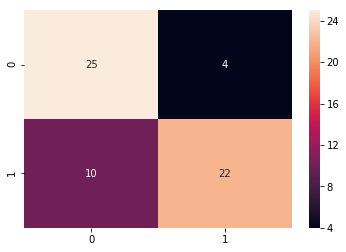

In [163]:
sns.heatmap(confusion_matrix(y_test, model.predict_classes(X_test)), annot=True)

In [164]:
print('The accuracy of the SVC is',accuracy_score(y_test, model.predict_classes(X_test)))

The accuracy of the SVC is 0.7704918032786885
